## Описание набора данных и постановка задачи

В данных представленны данные по числености населения (столбец "Population" кол. чел.), ВВП (солбец "GDP" долл. США) и ВВП на душу населения (столбец "GDP_per_capita" долл. США). Данные взяты с сайта МВФ за 2019 год.

Задачей проекта является кластеризация данных, и на основе данных Каталонии и Испании(без учета Каталонии), выяснить к какому кластеру они относятся

# Загрузка данных

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

### Выгрузка данных из файла

Выгружаем датасет и удалем из него данные по Испании, и присоединяем вместо него данные по Каталонии и Испании(без учета Каталонии)

In [8]:
data = pd.read_csv('countries.csv', index_col='Country')

In [9]:
data

,Population,GDP,GDP_per_capita
Country,,,
Afghanistan,32200000,18880000000,586.335404
Albania,2880000,15400000000,5347.222222
Algeria,43420000,171670000000,3953.707969
Andorra,80000,3160000000,39500.000000
Angola,32350000,84520000000,2612.673879
...,...,...,...
Vietnam,96480000,331820000000,3439.262023
West Bank and Gaza,4980000,17130000000,3439.759036
Yemen,31170000,21890000000,702.277831


In [10]:
data = data.drop(['Spain'])

In [11]:
spain_data = {'Population': [39550000.0], 'GDP': [1164000000000.0]}
spain_index = ['Spain']
spain = pd.DataFrame(data=spain_data, index = spain_index)
spain['GDP_per_capita'] = spain['GDP'] / spain['Population']

In [12]:
catalonia_data = {'Population': [7560000.0], 'GDP': [226000000000.0]}
catalonia_index = ['Catalonia']
catalonia = pd.DataFrame(data=catalonia_data, index = catalonia_index)
catalonia['GDP_per_capita'] = catalonia['GDP'] / catalonia['Population']

In [13]:
data = pd.concat(objs=[
    data,
    catalonia,
    spain
])

Убираем из данных выбросы (стран с очень высокими показателями числености населения, ВВП и ВВП на душу населения), которые существенно влияют на построение модели.

In [14]:
z = np.abs(stats.zscore(data))
 
data = data[(z<3).all(axis=1)]

Данные очень разбросаны по масштабу, поэтому проводим линейную нормировку

In [15]:
data = (data - data.min()) / (data.max() - data.min())

In [16]:
data

,Population,GDP,GDP_per_capita
Afghanistan,0.120607,0.003678,0.004767
Albania,0.010753,0.002998,0.074535
Algeria,0.162645,0.033520,0.054114
Andorra,0.000262,0.000607,0.575023
Angola,0.121169,0.016498,0.034461
...,...,...,...
Yemen,0.116748,0.004266,0.006466
Zambia,0.068827,0.004543,0.014759
Zimbabwe,0.055826,0.005074,0.021758
Catalonia,0.028288,0.044131,0.434255


Удаляем из массива данные для Каталонии и Испании, для проведения кластеризации

In [17]:
data = data.drop(['Spain', 'Catalonia'])

# Проведение кластеризации и построение модели логистической регресии

Для проведения кластеризации будем использовать метод KMeans. Определяем необходимое количество кластеров с помошью графика Каменистая осыпь.

### Проведение кластеризации

In [18]:
final_data = data.copy()

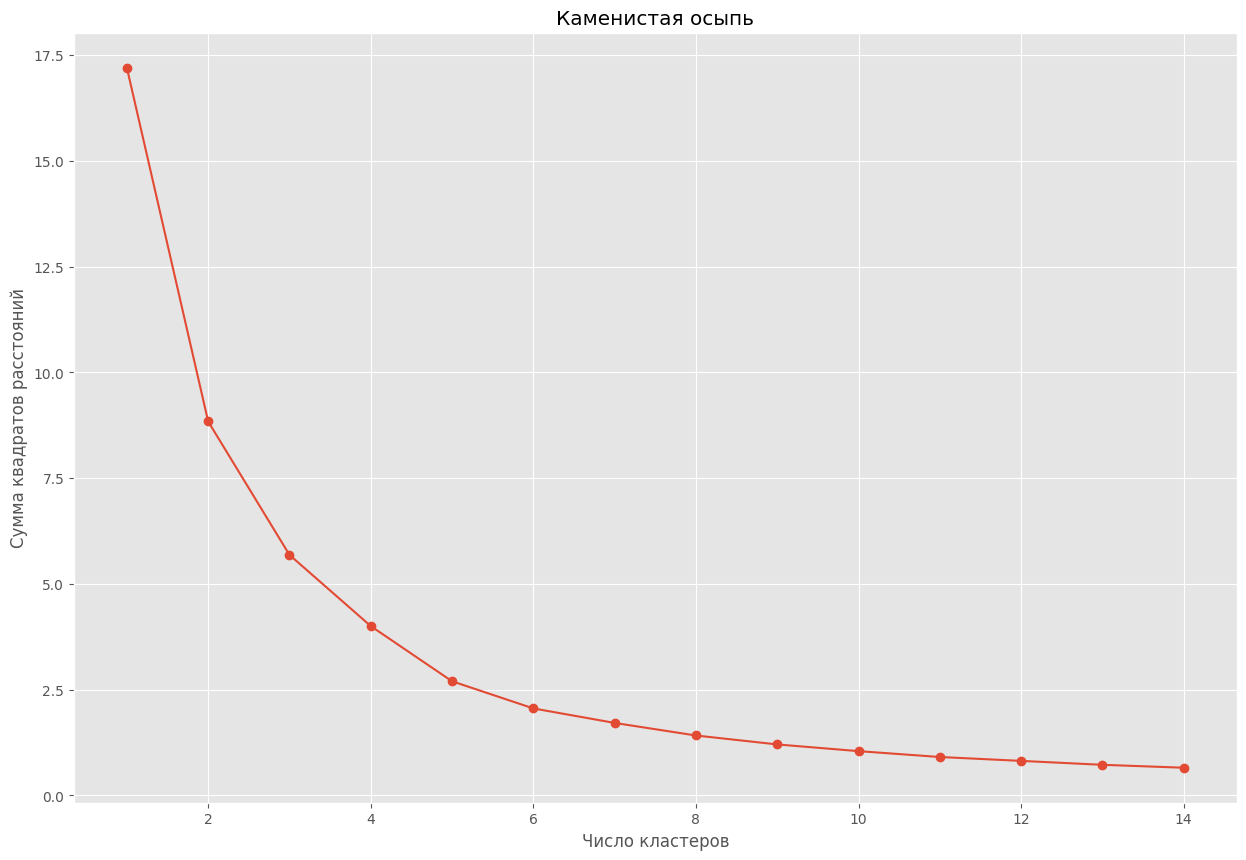

In [19]:
K = range(1, 15)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(data) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

По графику адекватное количество кластеров находиться в переделах от 5 до 8. Произведем кластеризацию для каждого случая и визуализируем полученные результаты.

            Population       GDP  GDP_per_capita
5_clusters                                      
0             0.262415  0.558031        0.590627
1             0.052843  0.009611        0.053827
2             0.530597  0.129059        0.063513
3             0.029192  0.078199        0.760173
4             0.024043  0.024828        0.304897


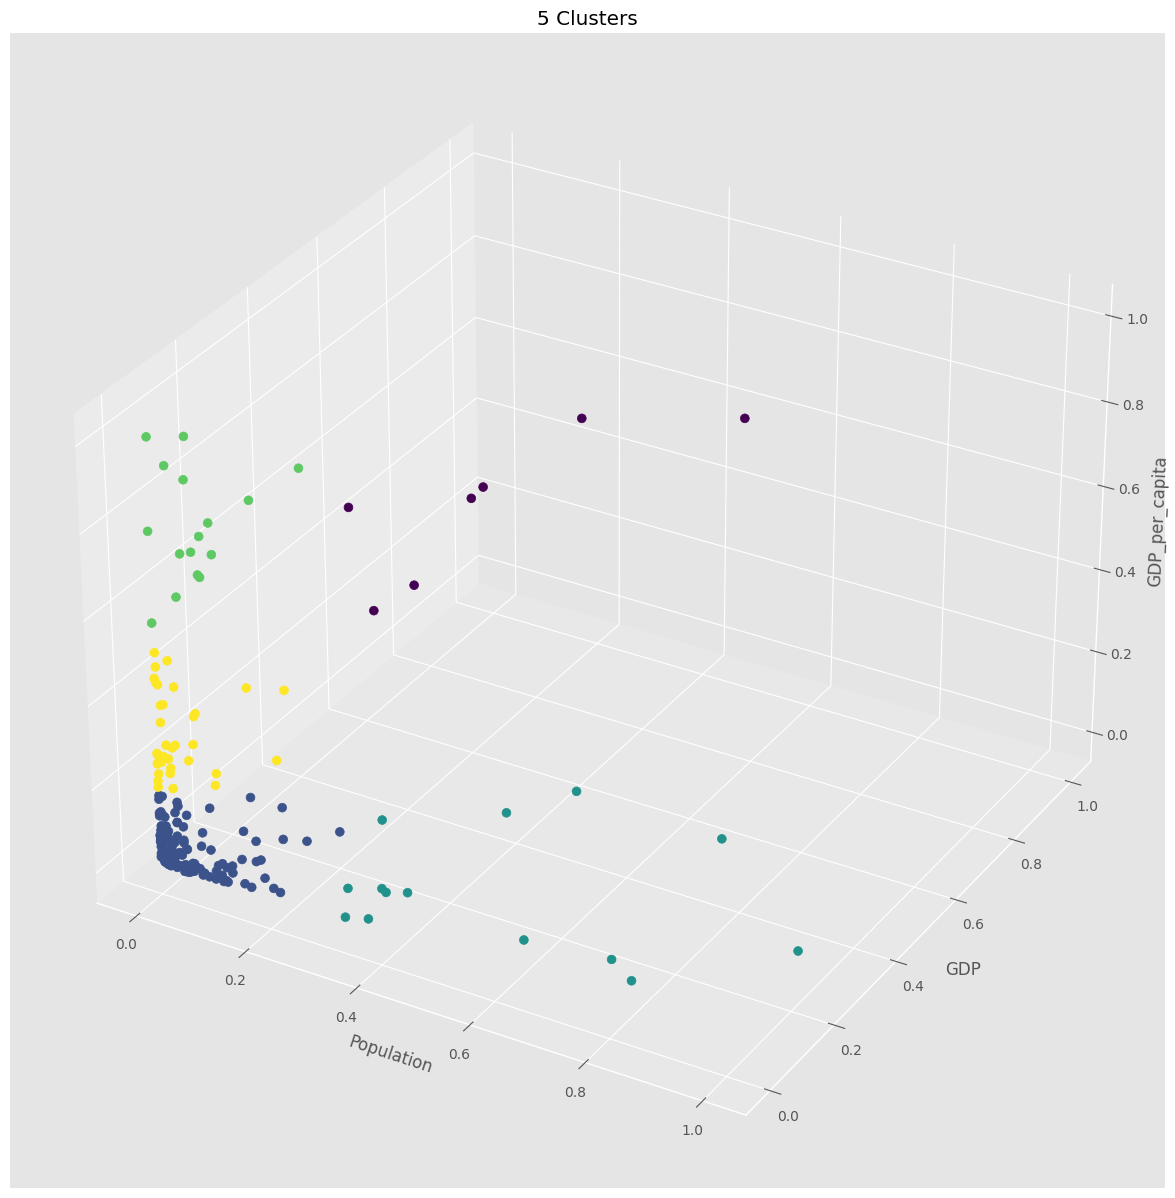

            Population       GDP  GDP_per_capita
6_clusters                                      
0             0.037358  0.005787        0.053298
1             0.029192  0.078199        0.760173
2             0.710956  0.197549        0.081163
3             0.262415  0.558031        0.590627
4             0.024043  0.024828        0.304897
5             0.244728  0.048711        0.053707


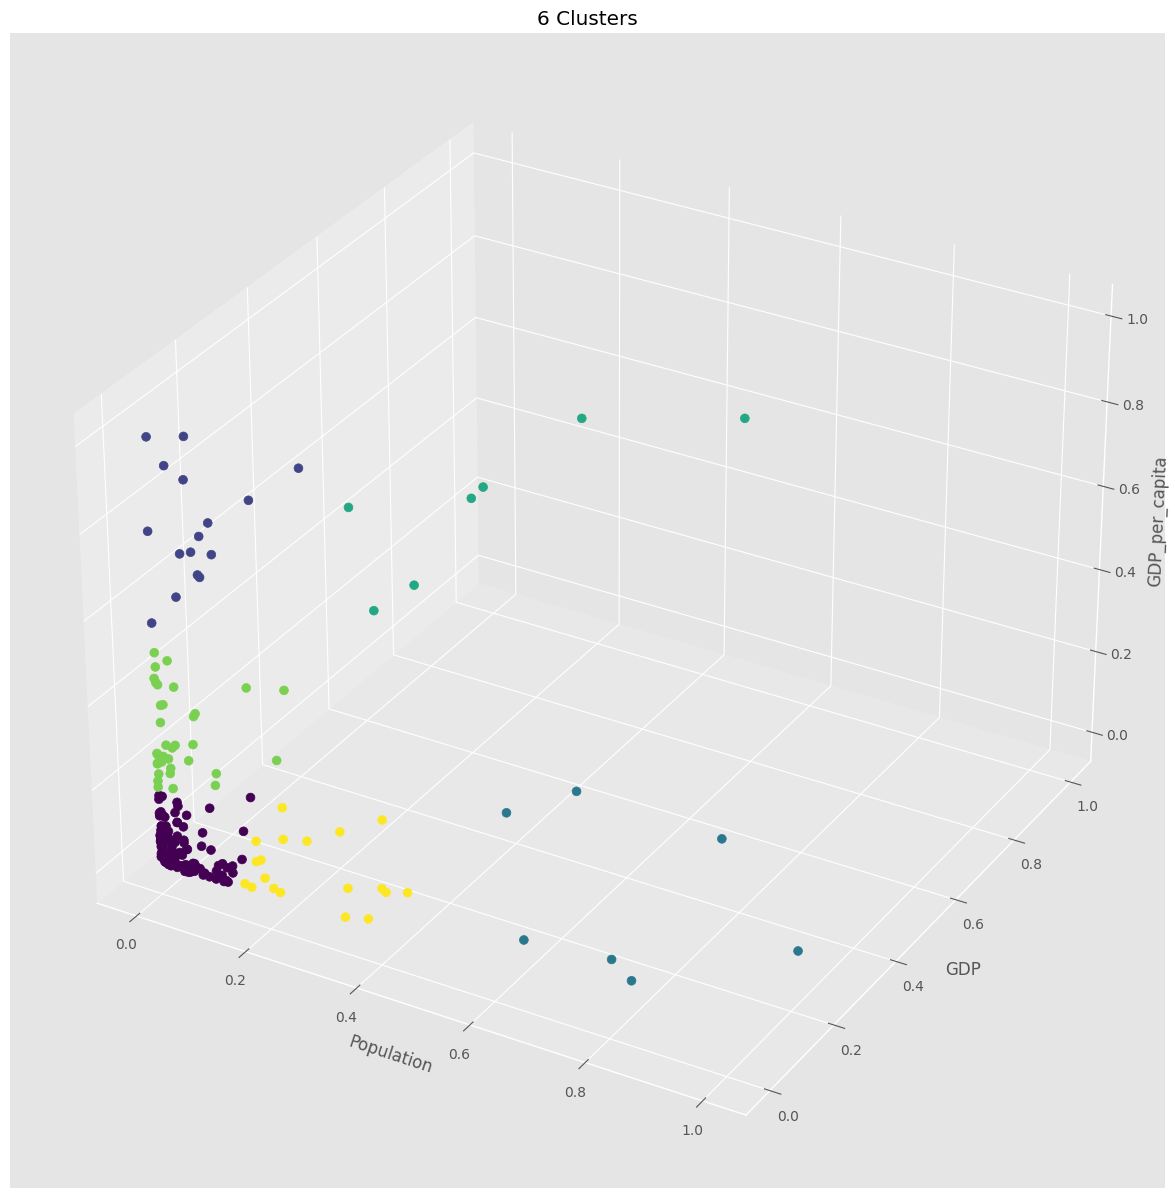

            Population       GDP  GDP_per_capita
7_clusters                                      
0             0.029192  0.078199        0.760173
1             0.244728  0.048711        0.053707
2             0.210551  0.429291        0.572306
3             0.037358  0.005787        0.053298
4             0.710956  0.197549        0.081163
5             0.024043  0.024828        0.304897
6             0.392076  0.879882        0.636430


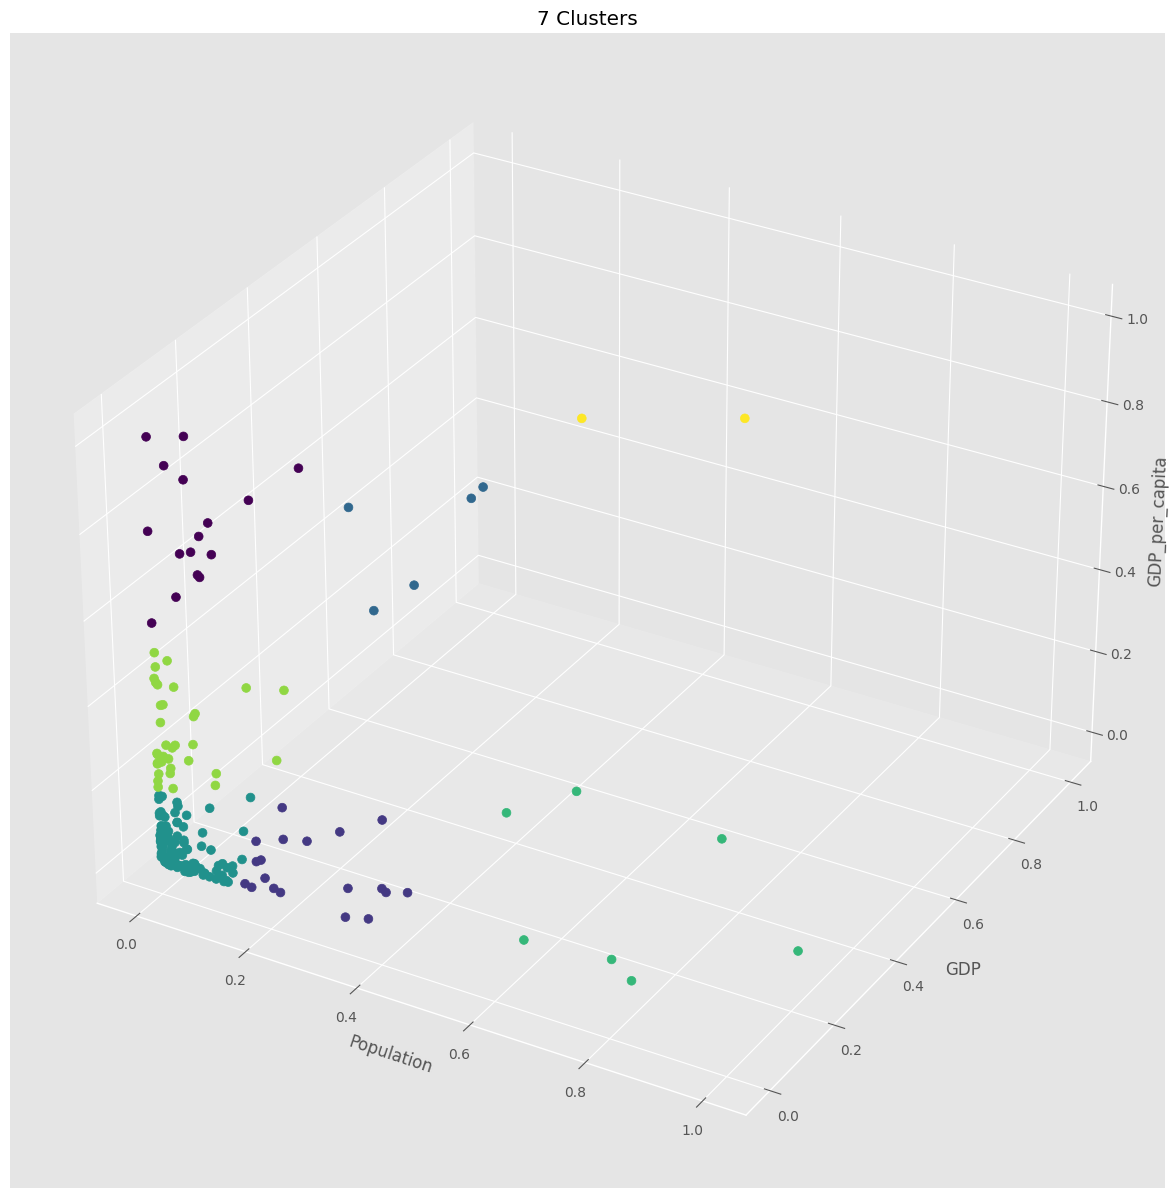

            Population       GDP  GDP_per_capita
8_clusters                                      
0             0.037503  0.004758        0.045782
1             0.031120  0.083372        0.772517
2             0.710956  0.197549        0.081163
3             0.023447  0.031019        0.417330
4             0.210551  0.429291        0.572306
5             0.392076  0.879882        0.636430
6             0.244728  0.048711        0.053707
7             0.026356  0.019340        0.216643


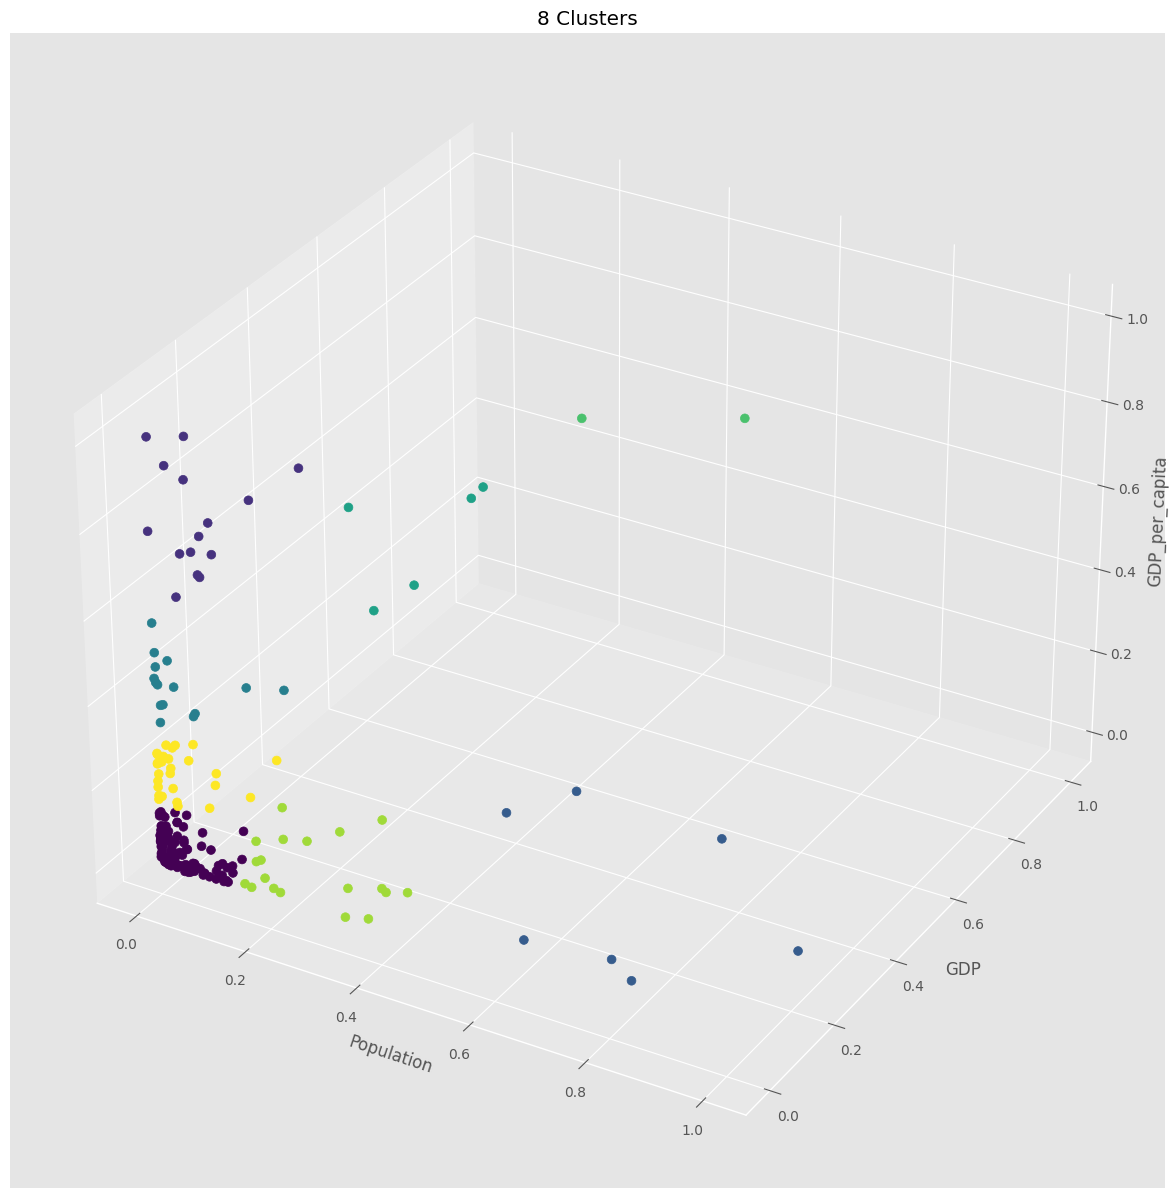

In [20]:
for i in range(5,9):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(data)

  final_data[f'{i}_clusters'] = model.labels_

  print(final_data.groupby(f'{i}_clusters')[['Population','GDP','GDP_per_capita']].mean())

  threedee = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
  threedee.scatter(data["Population"], data["GDP"], data["GDP_per_capita"], c = final_data[f'{i}_clusters'], alpha = 1, s =40)
  threedee.set_xlabel('Population')
  threedee.set_ylabel('GDP')
  threedee.set_zlabel('GDP_per_capita')
  threedee.set_title(f'{i} Clusters')
  plt.show()

Изучив полученные кластеры и их визуализацию, принимаю решение остановиться на 6 кластерах. 
Краткое описание каждого кластера:

0) бедные страны;

1) очень богатые малонаселенные страны;

2) бедные страны, с очень большим населением;

3) богатые страны, с большим населением;

4) среднеразвитые страны, небольшой числености;

5) бедные страны с большим населением.

По итогу добаляю в массив столбец с определенным кластером.


In [21]:
model = KMeans(n_clusters = 6, random_state = 111, n_init = 100, max_iter = 10000)
model.fit(data)

data[f'clusters'] = model.labels_

### Логистическая регрессия

Отбираю данные для предикторов и столбец отклика. И провожу построение модели логистической регрессии

In [22]:
train_model = data.copy()

In [35]:
# данные для предикторов
X = train_model.drop(columns='clusters').values

In [44]:
# столбец отклика
y = train_model[['clusters']].values.ravel()

In [45]:
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y)

В качестве тестовых данных использую данные по Каталонии и Испании(без учета Каталонии).

In [46]:
catalonia = [0.028288, 0.044131, 0.434255]

In [47]:
spain = [0.148145, 0.227336, 0.427469]

In [48]:
reg.predict([catalonia])

array([4], dtype=int32)

In [49]:
reg.predict_proba([catalonia])

array([[0.27320261, 0.18274146, 0.03002456, 0.05324462, 0.3741119 ,
        0.08667484]])

In [50]:
reg.predict([spain])

array([4], dtype=int32)

In [51]:
reg.predict_proba([spain])

array([[0.20486865, 0.18782283, 0.05746714, 0.10495448, 0.32365685,
        0.12123004]])

Как видно из полученных результатов, и Каталония и Испания попали в 4 кластер (среднеразвитые страны, небольшой числености), что в целом соответсвует современной действительности. Поэтому данную можель можно считать состоятельной.